## Predicting the Sale Price of Bulldozer Price using machine learning

dataset - 'https://www.kaggle.com/c/bluebook-for-bulldozers/data'

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [39]:
## Importing training and validation sets
df=pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)

In [40]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.shape

(412698, 53)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [43]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

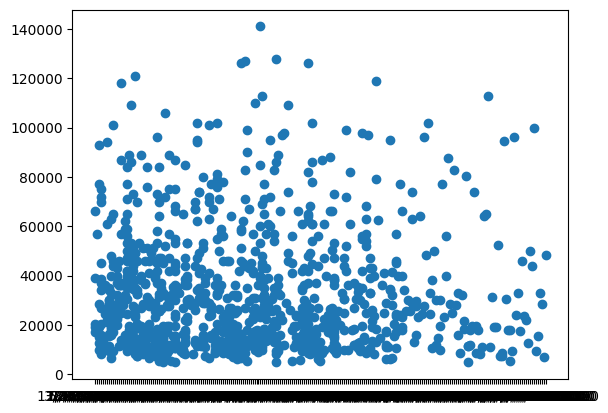

In [44]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

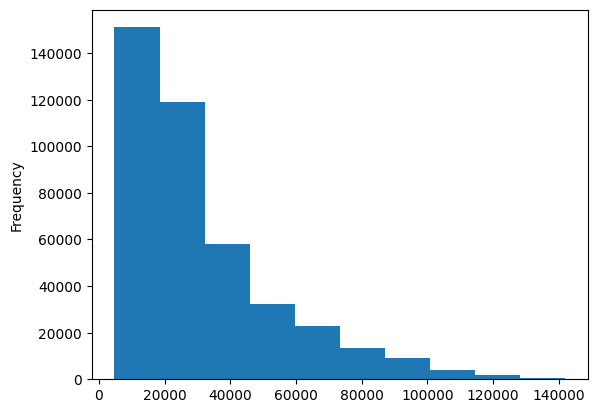

In [45]:
df.SalePrice.plot.hist();

### Parsing Dates

In [46]:
# Import the dataset by parsing the date column
df=pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])


In [47]:
df.saledate.dtype

dtype('<M8[ns]')

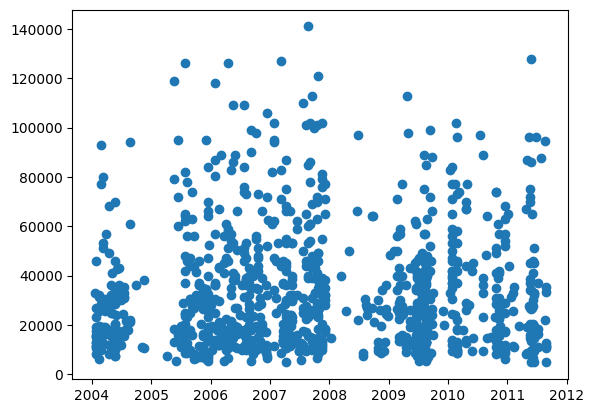

In [48]:
plt.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [49]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data, its good idea to sort it by date

In [50]:
df.sort_values(by=['saledate'],ascending=True,inplace=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [51]:
### Making a copy of original data set
df_tmp=df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


**Feature Engineering**

### Add datetime parameters for `saledate` column

In [52]:
df_tmp['saleYear']=df.saledate.dt.year
df_tmp['saleMonth']=df.saledate.dt.month
df_tmp['saleDay']=df.saledate.dt.day
df_tmp['saleDayOfYear']=df.saledate.dt.day_of_year
df_tmp['saleDayOfWeek']=df.saledate.dt.dayofweek

In [53]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [54]:
## we dont need saledate column anymore since we have enriched our dataset using this
df_tmp.drop('saledate',axis=1,inplace=True)

In [55]:
df_tmp.ProductGroupDesc.value_counts()

Track Excavators       104230
Track Type Tractors     82582
Backhoe Loaders         81401
Wheel Loader            73216
Skid Steer Loaders      45011
Motor Graders           26258
Name: ProductGroupDesc, dtype: int64

## Preprocessing

In [56]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [57]:
## we have to convert categorical feature into numerical and 
## also remove nan values to train model
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,17,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,31,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,31,1


In [58]:
## Checking which column is string/object

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [59]:
## Converting the string into category value -> each column having strings is assigned to numerical code internally and for nan value, -1 is assigned

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype('category').cat.as_ordered()

In [60]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [61]:
df_tmp.Coupler.value_counts()

None or Unspecified    190449
Manual                  23918
Hydraulic                6312
Name: Coupler, dtype: int64

In [62]:
df_tmp.Coupler.cat.categories

Index(['Hydraulic', 'Manual', 'None or Unspecified'], dtype='object')

In [63]:
df_tmp.Coupler.cat.codes

205615   -1
274835    2
141296   -1
212552    2
62755    -1
         ..
410879   -1
412476    2
411927    2
407124   -1
409203    2
Length: 412698, dtype: int8

### Fill missing values

**Filling numeric missing values**

In [64]:
## checking which column is numeric

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek


In [65]:
## checking which numeric column contains null values

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [66]:
## filling the null values with median

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## Add a binary coulmn which tells if the data was missing or not
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            ## fill the missing value with median
            df_tmp[label]=content.fillna(content.median())

In [67]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [68]:
## checking if there any null numeric value

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [69]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [70]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical values into numerical values

In [71]:
## checking which column is categorical

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [72]:
## Turning categorical variables into numbers and fill missing

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        ## Fill the missing value
        df_tmp[label]=pd.Categorical(content).codes+1
        ## Adding a binary column telling whether sample has missing values
        df_tmp[label+"_is_missing"]=pd.isnull(content)

In [74]:
pd.Categorical(df_tmp['UsageBand']).codes+1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [75]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [76]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [78]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling 

In [80]:
## Splitting the data into training/validation set
## Training set -> rows upto 2011 year
## Validation set -> rows of 2012 year

df_val=df_tmp[df_tmp.saleYear == 2012]
df_train=df_tmp[df_tmp.saleYear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [81]:
## Splitting the testing and validation set into X and y

X_train,y_train=df_train.drop('SalePrice',axis=1),df_train['SalePrice']
X_valid,y_valid=df_val.drop('SalePrice',axis=1),df_val['SalePrice']

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [86]:
## Fitting the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,r2_score

In [92]:
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_valid)
    scores={'Training MAE':mean_absolute_error(y_train,train_preds),
           'Valid MAE':mean_absolute_error(y_valid,valid_preds),
           'Training RMSLE':rmsle(y_train,train_preds),
           'Valid RMSLE':rmsle(y_valid,valid_preds),
           'Training R^2':r2_score(y_train,train_preds),
           'Valid R^2':r2_score(y_valid,valid_preds)}
    return scores

### Testing the model on a subset(to tune the hyperparameters)

In [87]:
## This takes far long time .. for experimenting

# %%time
# model=RandomForestRegressor(n_jobs=-1, random_state=42)
# model.fit(X_train,y_train)

In [90]:
## To train the model on the subset-> use parameter max_samples
model=RandomForestRegressor(n_jobs=-1, random_state=42,max_samples=10000)
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [93]:
show_scores(model)

{'Training MAE': 5561.138281258958,
 'Valid MAE': 7171.251002333016,
 'Training RMSLE': 0.2577410303930966,
 'Valid RMSLE': 0.2930925556053619,
 'Training R^2': 0.860649958144041,
 'Valid R^2': 0.832162894701184}

### Hyperparameter tuning - RandomizedSearchCV

In [97]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid={'n_estimators':np.arange(10,100,10),
         'max_depth':[None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2),
         'max_features':[0.5,1,'sqrt','auto'],
         'max_samples':[10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=5,
                            cv=5,
                            verbose=True)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [98]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [99]:
## Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6269.569568690964,
 'Valid MAE': 7862.077361535959,
 'Training RMSLE': 0.2833757413483214,
 'Valid RMSLE': 0.3133402570096787,
 'Training R^2': 0.8218635435900157,
 'Valid R^2': 0.7902569088954636}

In [116]:
## Score for the ideal_model(trained on all the data) -> giving in lecture
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [101]:
## Trained on all the dataset 
show_scores(ideal_model)

{'Training MAE': 2951.890756700501,
 'Valid MAE': 5969.165323345881,
 'Training RMSLE': 0.14462583722939487,
 'Valid RMSLE': 0.24663841252433094,
 'Training R^2': 0.9588959217158949,
 'Valid R^2': 0.8817109349545978}

In [102]:
## Trained on 10,000 dataset
show_scores(rs_model)

{'Training MAE': 6269.569568690964,
 'Valid MAE': 7862.077361535959,
 'Training RMSLE': 0.2833757413483214,
 'Valid RMSLE': 0.3133402570096787,
 'Training R^2': 0.8218635435900157,
 'Valid R^2': 0.7902569088954635}

## Make prediction on test data

In [105]:
df_test=pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates=['saledate'])
df_test.shape

(12457, 52)

In [104]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [106]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Preprocessing the data(test data) in same format as our training dataset

In [107]:
def preprocess_data(df):
    
    df['saleYear']=df.saledate.dt.year
    df['saleMonth']=df.saledate.dt.month
    df['saleDay']=df.saledate.dt.day
    df['saleDayOfYear']=df.saledate.dt.day_of_year
    df['saleDayOfWeek']=df.saledate.dt.dayofweek

    df.drop('saledate',axis=1,inplace=True)

    ## Fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                ## Add a binary coulmn ehich tells if the data was missing or not
                df[label+"_is_missing"]=pd.isnull(content)
                ## fill the missing value with median
                df[label]=content.fillna(content.median())
                
        ## Fill the categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=pd.Categorical(content).codes+1
            df[label+"_is_missing"]=pd.isnull(content)


    return df

In [108]:
df_test=preprocess_data(df_test)

In [110]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [111]:
df_test.shape,df_train.shape

((12457, 101), (401125, 103))

In [113]:
## Seeing what missing column in test dataframe from training dataframe
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [114]:
## Reason -> auctioneer id has no null values in test dataset
df_test['auctioneerID_is_missing']=False
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [122]:
# Reorder and select only the columns used in training
df_test = df_test[X_train.columns]  

In [123]:
## Now fitting the model 
test_preds=ideal_model.predict(df_test)
test_preds

array([18014.73165285, 16419.09710656, 50209.13524341, ...,
       12649.93261199, 15933.42591452, 28947.03281667])

In [124]:
len(test_preds)

12457

In [126]:
## Format the prediction in format kaggle is asking for
df_preds=pd.DataFrame()
df_preds['SalesID']=df_test['SalesID']
df_preds['SalePrice']=test_preds
df_preds

,SalesID,SalePrice
0,1227829,18014.731653
1,1227844,16419.097107
2,1227847,50209.135243
3,1227848,65926.361184
4,1227863,59296.671282
...,...,...
12452,6643171,47379.340097
12453,6643173,11197.425404
12454,6643184,12649.932612
12455,6643186,15933.425915


### Feature Importance

In [127]:
## Finding the feature importance of our best model
ideal_model.feature_importances_

array([3.40118086e-02, 1.78445053e-02, 4.13741837e-02, 2.00722379e-03,
       3.35133563e-03, 2.09606754e-01, 3.20537432e-03, 1.07716828e-03,
       4.12695641e-02, 5.13611702e-02, 5.95901259e-02, 4.52661351e-03,
       1.68313943e-02, 1.60962162e-01, 4.60593447e-02, 5.88666385e-03,
       2.33928710e-03, 2.85857266e-03, 3.68865682e-03, 5.14996011e-02,
       7.42341162e-04, 7.74232475e-05, 1.34800290e-03, 1.73095211e-04,
       1.06545608e-03, 2.45475504e-05, 2.03184947e-03, 4.56346248e-03,
       2.60535365e-04, 2.22528348e-03, 4.45748952e-03, 1.32649090e-03,
       3.49813517e-03, 1.23719917e-03, 2.74525292e-04, 7.12009135e-03,
       7.91756939e-04, 1.47410152e-02, 1.68726540e-03, 1.49964100e-03,
       5.90586639e-04, 8.59783678e-04, 1.61386844e-03, 6.16918635e-04,
       8.08519624e-04, 3.58455014e-04, 2.92088600e-04, 2.62663936e-03,
       9.68963989e-04, 2.05437530e-04, 3.29199569e-04, 7.36797004e-02,
       3.76309243e-03, 5.68023884e-03, 9.82142412e-03, 2.93126783e-03,
      

In [129]:
len(ideal_model.feature_importances_),X_train.shape

(102, (401125, 102))

In [136]:
## Helper function for plotting feature importance

def plot_feature(columns,importance,n=20):
    df=(pd.DataFrame({'features':columns,
                      'feature_importances':importance})
        .sort_values('feature_importances',ascending=False)
        .reset_index(drop=False))

    # Plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()


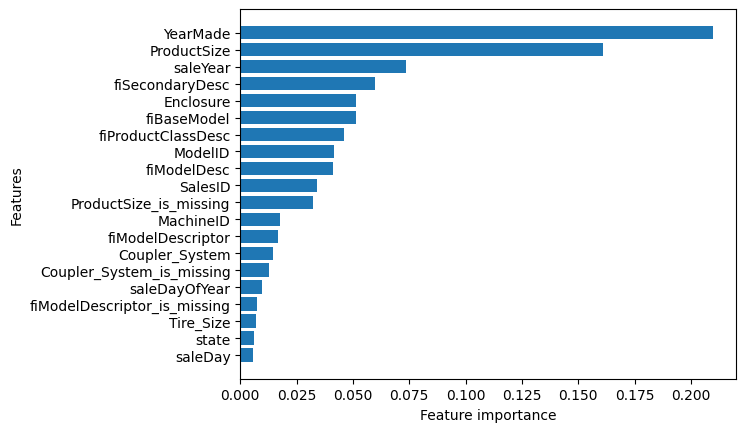

In [137]:
plot_feature(X_train.columns,ideal_model.feature_importances_)